In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


class Tuition:
    def __init__(self, costs_file, states_file, years_file):
        self.costs = pd.read_csv(costs_file, header=0).iloc[:, 1:]  # remove Alaska
        self.states = pd.read_csv(states_file, header=None)[0].iloc[1:].tolist()  # remove Alaska
        self.years = pd.read_csv(years_file, header=None)[0].str.split('-').str[0].tolist()

    def get_current_tuition_stats(self):
        tuition_2022 = self.costs.iloc[:, -1]
        return [int(round(tuition_2022.min())), int(round(tuition_2022.max())), int(round(tuition_2022.mean())),
                int(round(tuition_2022.median()))]

    def plot_tuition_distribution(self):
        tuition_2022 = self.costs.iloc[:, -1]
        num_states = len(tuition_2022)
        plt.hist(tuition_2022, bins=20)
        plt.title("Tuition Distribution in 2022-23")
        plt.xlabel("Tuition")
        plt.ylabel("Number of States")
        plt.show()
        return num_states

    def plot_lowest_tuition_states(self, n_states):
        tuition_2022 = self.costs.iloc[:, -1]
        lowest_tuition_states = tuition_2022.nsmallest(n_states)
        lowest_tuition_states_names = self.costs.iloc[lowest_tuition_states.index].index.tolist()
        plt.bar(lowest_tuition_states_names, lowest_tuition_states)
        plt.title(f"Tuition for the {n_states} States with the Lowest Tuition in 2022-23")
        plt.xlabel("State")
        plt.ylabel("Tuition")
        plt.xticks(rotation=45, ha='right')
        plt.show()
        return self.states[tuition_2022.idxmin()]

    def plot_tuition_trend(self):
        tuition_diff = self.costs.diff(axis=1).iloc[:, 1:]
        largest_increase_states = tuition_diff.sum().nlargest(5).index.tolist()
        smallest_increase_state = tuition_diff.sum().nsmallest(1).index[0]
        for state in largest_increase_states:
            plt.plot(self.years, self.costs.loc[self.states.index(state), :], label=state, marker='o')
        plt.plot(self.years, self.costs.loc[self.states.index(smallest_increase_state), :], label=smallest_increase_state, marker='s')
        plt.title("Tuition Trend from First to Last Available Years")
        plt.xlabel("Year")
        plt.ylabel("Tuition")
        plt.legend(loc="best")
        plt.show()
        return self.states[self.costs.diff(axis=1).iloc[:, 1:].sum().idxmax()]

In [3]:
costs_filepath = "/Users/alexhagemeister/PROGRAMMING/Python/AdvancedPython_Spring2023/CIS 41B Modules/MOD_2_DataAnalysis_Visualization_GUI/Assignment2/costs.csv"
states_filepath = "/Users/alexhagemeister/PROGRAMMING/Python/AdvancedPython_Spring2023/CIS 41B Modules/MOD_2_DataAnalysis_Visualization_GUI/Assignment2/states.csv"
years_filepath = "/Users/alexhagemeister/PROGRAMMING/Python/AdvancedPython_Spring2023/CIS 41B Modules/MOD_2_DataAnalysis_Visualization_GUI/Assignment2/years.csv"

tuition = Tuition(costs_filepath, states_filepath, years_filepath)

In [4]:
tuition.get_current_tuition_stats()

[0, 8660, 4622, 4639]

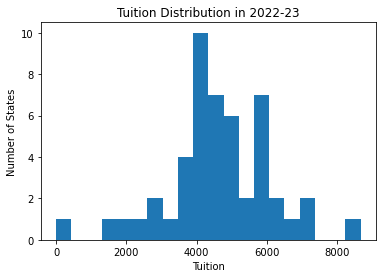

49

In [5]:
tuition.plot_tuition_distribution()